In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Генерируем смесь нормального и однородного распределений

Text(0.5,0,'x')

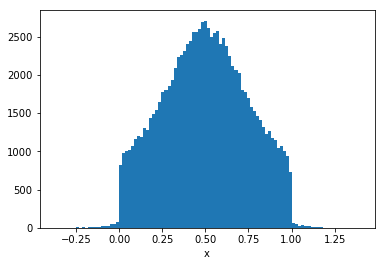

In [6]:
a = 0
b = 1
tau = 0.5
mu = 0.5
sigma = 0.2
n = 100000
n_n = int(tau * n)
n_u = n - n_n

x_n = np.random.normal(mu, sigma, n_n)
x_u = np.random.uniform(a, b, n_u)
x = np.concatenate((x_n, x_u))
plt.hist(x, 100)
plt.xlabel('x')

In [8]:
def t(x, tau, mu, sigma2):
    x = np.asarray(x)
    t_n = tau / np.sqrt(2*np.pi * sigma2) * np.exp(-0.5*(x-mu)**2 / sigma2)
    idx = (x > a) & (x < b)
    t_u = np.zeros_like(x)
    t_u[idx] = (1 - tau) / (b-a)
    return np.vstack((t_n / (t_u+t_n), t_u / (t_u+t_n)))


def theta(x, old):
    t_n, t_u = t(x, *old)
    tau = np.sum(t_n) / np.sum(t_n + t_u)
    mu = np.sum(t_n * x) / np.sum(t_n)
    sigma2 = np.sum(t_n * (x - mu)**2) / np.sum(t_n)
    return tau, mu, sigma2


th = [0.3, 1, 0.1]  # начальные приближения для tau, mu, sigma^2
for i in range(100):
    th = theta(x, th)
print('tau = {}, mu = {}, sigma = {}'.format(th[0], th[1], np.sqrt(th[2])))

tau = 0.49375399829362365, mu = 0.499048854132533, sigma = 0.19950128503860357


# Генерируем смесь многомерных нормальных распредлений

Text(0,0.5,'$x_2$')

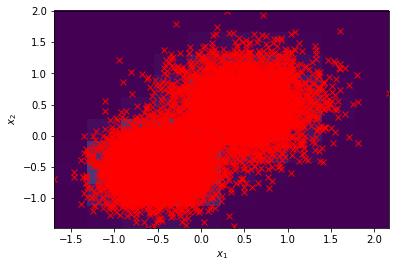

In [12]:
tau = 0.4
mu1 = np.array([0.5, 0.5])
mu2 = np.array([-0.5, -0.5])
sigma1 = 0.4
sigma2 = 0.3
n = 10000
n_1 = int(n * tau)
n_2 = n - n_1

x_n1 = stats.multivariate_normal(mu1, sigma1**2).rvs(n_1)
x_n2 = stats.multivariate_normal(mu2, sigma2**2).rvs(n_2)
x = np.vstack((x_n1, x_n2))
plt.hist2d(*x.T)
plt.plot(*x.T, 'x', color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')